# Python для анализа данных

## ДЗ 4

*Придумывал: Ян Пиле, НИУ ВШЭ*  

## Задача 1

Дана страница https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучший_фильм#Достижения_по_другим_номинациям_Оскара

Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) данные о номинантах и победителях премии Оскар за лучший фильм за всю историю существования премии. Заметьте, на страничке эта информация в нескольких таблицах. По данным ответьте на вопросы. P.S. Результат нужно именно посчитать, если на странице в явном виде указан ответ на вопрос, просто выгрузить этот ответ нельзя:

    1. Сколько раз были номинированы фильмы, созданные при участии Стивена Спилберга?
    2. Фильмы какой компании получили больше Оскаров за лучший фильм: Warner Bros. или Paramount Pictures и насколько больше?

In [2]:
import requests
link = 'https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучший_фильм#Достижения_по_другим_номинациям_Оскара'
website_url = requests.get(link).text

In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url, 'lxml')

In [4]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="ru">
 <head>
  <meta charset="utf-8"/>
  <title>
   Премия «Оскар» за лучший фильм — Википедия
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"YEeg6kb215beNS1PakaCOQAAAIQ","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Премия_«Оскар»_за_лучший_фильм","wgTitle":"Премия «Оскар» за лучший фильм","wgCurRevisionId":111827675,"wgRevisionId":111827675,"wgArticleId":287076,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":[
"Википедия:Статьи с некорректным использованием шаблонов:Cite web (недоступные ссылки без архивной копии)","

In [5]:
# вытаскиваем все таблицы
tables = soup.find_all('table')

In [304]:
# для проверки достаем одну таблицу в пандас датафрэйм
import pandas as pd
df = pd.read_html(str(tables))[0]
df

,Год/Церемония,Фильм,Кинокомпания(и),Продюсер(ы),Ссылки
0,1929 (1-я),★ «Крылья»,"Paramount Pictures, Famous Players-Lasky",Люсьен Хаббард,[# 1]
1,1929 (1-я),«Рэкет»,"Caddo, Paramount",Говард Хьюз,[# 1]
2,1929 (1-я),«Седьмое небо»,Fox Film Corporation,Уильям Фокс,[# 1]
3,1930-I (2-я),★ «Бродвейская мелодия»,Metro-Goldwyn-Mayer,"Ирвинг Талберг, Лоуренс Уэйнгартен",[# 2]
4,1930-I (2-я),«Алиби»,"Feature Productions, United Artists",Роланд Уэст,[# 2]
5,1930-I (2-я),«Голливудское ревю 1929 года»,Metro-Goldwyn-Mayer,Гарри Рапф,[# 2]
6,1930-I (2-я),«В старой Аризоне»,Fox Film Corporation,Уинфилд Шихэн,[# 2]
7,1930-I (2-я),«Патриот»,Paramount Pictures,Эрнст Любич,[# 2]
8,1930-II (3-я),★ «На западном фронте без перемен»,Universal,Карл Леммле-мл.,[# 3]
9,1930-II (3-я),«Казённый дом»,Metro-Goldwyn-Mayer,Ирвинг Талберг,[# 3]


In [7]:
# вытаскиваем в пандас датафрэйм все таблицы с номинантами и победителями за 1929-2020

import pandas as pd

df_list = []
for i in range(0, 10):
    df_list.append(pd.read_html(str(tables))[i])
df = pd.concat(df_list)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df.info(verbose=False)
df



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Columns: 5 entries, Год/Церемония to Ссылки
dtypes: object(5)
memory usage: 22.1+ KB


,Год/Церемония,Фильм,Кинокомпания(и),Продюсер(ы),Ссылки
0,1929 (1-я),★ «Крылья»,"Paramount Pictures, Famous Players-Lasky",Люсьен Хаббард,[# 1]
1,1929 (1-я),«Рэкет»,"Caddo, Paramount",Говард Хьюз,[# 1]
2,1929 (1-я),«Седьмое небо»,Fox Film Corporation,Уильям Фокс,[# 1]
3,1930-I (2-я),★ «Бродвейская мелодия»,Metro-Goldwyn-Mayer,"Ирвинг Талберг, Лоуренс Уэйнгартен",[# 2]
4,1930-I (2-я),«Алиби»,"Feature Productions, United Artists",Роланд Уэст,[# 2]
...,...,...,...,...,...
558,2020 (92-я),«Джокер»,NaN,"Тодд Филлипс, Брэдли Купер и Эмма Тиллинджер К...",NaN
559,2020 (92-я),«Маленькие женщины»,NaN,Эми Паскаль,NaN
560,2020 (92-я),«Брачная история»,NaN,Ноа Баумбах и Дэвид Хейман,NaN
561,2020 (92-я),«1917»,NaN,"Сэм Мендес, Пиппа Харрис, Джейн‑Энн Тенггрен и...",NaN


In [8]:
# 1. Сколько раз были номинированы фильмы, созданные при участии Стивена Спилберга?

import re

data_Spilberg = []
for item in df['Продюсер(ы)']:
    regex = re.findall(r"[\w.,\s]*Стивен Спилберг[\w.,\s]*", item)
    if len(regex) != 0:
        data_Spilberg.append(regex)
print(len(data_Spilberg))

10


In [9]:
# 2. Фильмы какой компании получили больше Оскаров за лучший фильм: Warner Bros. или Paramount Pictures и насколько больше?

import re

WarnerBros = 0
Paramount = 0
dk = df[df['Фильм'].str.contains(r"[\w.,\s«»]*★ [\w.,\s«»]*")]
dk = dk.fillna('')
for item in dk['Кинокомпания(и)']:
    pattern1 = re.findall(r"[\w.,\s]*Warner Bros.[\w.,\s]*", item)
    pattern2 = re.findall(r"[\w.,\s]*Paramount Pictures[\w.,\s]*", item)
    if len(pattern1) != 0:
        WarnerBros += 1
    if len(pattern2) != 0:
        Paramount += 1
        
print(f"У WarnerBros. {WarnerBros} статуэток")
print(f"У Paramount {Paramount} статуэток")

if WarnerBros > Paramount:
    print(
        f"У WarnerBros. больше Оскаров за лучший фильм на {WarnerBros-Paramount}")
elif WarnerBros < Paramount:
    print(
        f"У WarnerBros. больше Оскаров  за лучший фильм на {Paramount-WarnerBros}")
else:
    print("Поровну Оскаров")

У WarnerBros. 10 статуэток
У Paramount 9 статуэток
У WarnerBros. больше Оскаров за лучший фильм на 1


## Задача 2

Дана страница https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучшую_женскую_роль

Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) данные о номинантах и победителях премии Оскар за лучшую женскую роль за всю историю существования премии. Заметьте, на страничке эта информация в нескольких таблицах. По данным ответьте на вопросы. P.S. Результат нужно именно посчитать, если на странице в явном виде указан ответ на вопрос, просто выгрузить этот ответ нельзя:

    1. Какая актриса чаще всего номинировалась на Оскар?
    2. Насколько отличается количество номинаций самой часто номинировавшейся актрисы и второй по частоте?

In [1]:
import requests
link="https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучшую_женскую_роль"
web_site_url=requests.get(link).text

In [2]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(web_site_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="ru">
 <head>
  <meta charset="utf-8"/>
  <title>
   Премия «Оскар» за лучшую женскую роль — Википедия
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"YFMABQGZKarQXTUGcuTApAAAAFI","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Премия_«Оскар»_за_лучшую_женскую_роль","wgTitle":"Премия «Оскар» за лучшую женскую роль","wgCurRevisionId":111245888,"wgRevisionId":111245888,"wgArticleId":386356,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":[
"Википедия:Статьи с некорректным использованием шаблонов:Cite web (не указан язык)","Ст

In [3]:
tables=soup.find_all('table')
tables

[<table cellpadding="0" class="flaggedrevs-color-1" id="mw-fr-revisionratings-box" style="margin: auto;"><tr><td class="fr-text" style="vertical-align: middle;">Состояние</td><td class="fr-value40" style="vertical-align: middle;">отпатрулирована</td></tr>
 </table>,
 <table class="infobox" data-name="Карточка премии" style=""><tbody><tr><th class="infobox-above" colspan="2" style="">Премия «Оскар» за лучшую женскую роль</th></tr><tr><td class="" colspan="2" style="text-align:center;"><span class="no-wikidata" data-wikidata-property-id="P1705">Academy Award for Best Actress</span></td></tr><tr><td class="infobox-image" colspan="2" style=""> <span class="no-wikidata" data-wikidata-property-id="P18"><a class="image" href="/wiki/%D0%A4%D0%B0%D0%B9%D0%BB:Renee_Zellweger_2016_avp_BJ.jpg" title="Рене Зеллвегер, лауреат 2020 года"><img alt="Рене Зеллвегер, лауреат 2020 года" data-file-height="800" data-file-width="566" decoding="async" height="311" src="//upload.wikimedia.org/wikipedia/commons

In [138]:
import pandas as pd
df=pd.read_html(str(tables))[2]
df.info(verbose=False)
df.columns
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Columns: 5 entries, Церемония to Роль
dtypes: float64(1), object(4)
memory usage: 848.0+ bytes


,Церемония,Фото лауреата,Актриса,Фильм(ы),Роль
0,1-я (1929),NaN,• Джанет Гейнор,«Седьмое небо»,Дайана
1,1-я (1929),NaN,• Джанет Гейнор,«Уличный ангел»,Анджела
2,1-я (1929),NaN,• Джанет Гейнор,«Восход солнца»,жена
3,1-я (1929),NaN,• Луиза Дрессер,«Корабль приплывает»,миссис Плезник
4,1-я (1929),NaN,• Глория Свенсон,«Сэди Томпсон»,Сэди Томпсон
5,2-я (1930-I),NaN,• Мэри Пикфорд,«Кокетка»,Норма Безант
6,2-я (1930-I),NaN,• Рут Чаттертон,«Мадам Икс»,Жаклин Флорио
7,2-я (1930-I),NaN,• Бетти Компсон,«Зазывала»,Кэрри
8,2-я (1930-I),NaN,• Джинн Иглс (посмертно),«Письмо»,Лесли Кросби
9,2-я (1930-I),NaN,• Коринна Гриффит,«Божественная леди»,леди Эмма Гамильтон


In [139]:
import re

df_list = []
for i in range(2,12):
    df_list.append(pd.read_html(str(tables))[i])
df=pd.concat(df_list)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.drop('Роль.1',axis=1,inplace=True)
df.replace({'Актриса':r'• '},value=r'',regex=True, inplace=True)
df
    

,Церемония,Фото лауреата,Актриса,Фильм(ы),Роль,Фильм
0,1-я (1929),NaN,Джанет Гейнор,«Седьмое небо»,Дайана,NaN
1,1-я (1929),NaN,Джанет Гейнор,«Уличный ангел»,Анджела,NaN
2,1-я (1929),NaN,Джанет Гейнор,«Восход солнца»,жена,NaN
3,1-я (1929),NaN,Луиза Дрессер,«Корабль приплывает»,миссис Плезник,NaN
4,1-я (1929),NaN,Глория Свенсон,«Сэди Томпсон»,Сэди Томпсон,NaN
...,...,...,...,...,...,...
454,92-я (2020),NaN,Рене Зеллвегер,NaN,Джуди Гарленд,«Джуди»
455,92-я (2020),NaN,Синтия Эриво,NaN,Гарриет Табмен,«Гарриет»
456,92-я (2020),NaN,Скарлетт Йоханссон,NaN,Николь Барбер,«Брачная история»
457,92-я (2020),NaN,Сирша Ронан,NaN,Джозефина «Джо» Марч,«Маленькие женщины»


In [141]:
#1. Какая актриса чаще всего номинировалась на Оскар?
#2. Насколько отличается количество номинаций самой часто номинировавшейся актрисы и второй по частоте?

import collections
import re
freq_actress5 = collections.Counter(df['Актриса']).most_common(5)
freq_actress = collections.Counter(df['Актриса']).most_common(1)

result = re.sub(r'[{}\'(),\[\]]', ' ',str(freq_actress))
result = re.sub(r'\s+', ' ',result).strip()

dif_act = collections.Counter(df['Актриса']).most_common(2)
lst_dif_act=list(dict(dif_act).values())
name_dif_act=list(dict(dif_act).keys())

print(f"Чаще всего номинировалась на Оскар актриса {result}")
print(f"Количество номинаций самой часто номинировавшейся актрисы {name_dif_act[0]} и второй по частоте {name_dif_act[1]} отличается на {lst_dif_act[0]-lst_dif_act[1]}")


Чаще всего номинировалась на Оскар актриса Мерил Стрип 17
Количество номинаций самой часто номинировавшейся актрисы Мерил Стрип и второй по частоте Кэтрин Хепбёрн отличается на 5


## Задача 3

Дана страница https://www.worldometers.info/world-population/world-population-by-year/

На ней представлены данные о росте численности населения Земли. Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) необходимые данные и нарисовать графики ежегодного прироста городского населения и ежегодного прироста общего населения, начиная с 1951 года. Если вы сгрузили данные в pandas-dataframe, графики можно построить так:

In [154]:
import requests

link='https://www.worldometers.info/world-population/world-population-by-year/'

In [155]:
web_site_url=requests.get(link).text

In [157]:
web_site_url

'<!DOCTYPE html><!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--> <html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=device-width, initial-scale=1"> <title>World Population by Year - Worldometer</title><meta name="description" content="Population growth through history from 5000 BC to the current year (2021) for the entire population of the world"><link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon"><link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png"><link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png"><link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png"><link rel="apple-touch-icon" sizes="76x76" href="/favicon/apple-icon-76x76.png"><link rel="apple-touch-icon" sizes="114x114" href="/favicon/apple-icon-

In [181]:
from bs4 import BeautifulSoup

soup=BeautifulSoup(web_site_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   World Population by Year - Worldometer
  </title>
  <meta content="Population growth through history from 5000 BC to the current year (2021) for the entire population of the world" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
  <link href="/favicon/a

In [182]:
tables=soup.find_all('table')
tables
len(tables)

1

In [189]:
import pandas as pd
df=pd.read_html(str(tables))[0]
df.info(verbose=True)
df.columns
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              94 non-null     int64  
 1   World Population  94 non-null     int64  
 2   YearlyChange      70 non-null     object 
 3   NetChange         70 non-null     float64
 4   Density(P/Km²)    70 non-null     float64
 5   UrbanPop          70 non-null     float64
 6   UrbanPop %        70 non-null     object 
dtypes: float64(3), int64(2), object(2)
memory usage: 5.3+ KB


,Year,World Population,YearlyChange,NetChange,Density(P/Km²),UrbanPop,UrbanPop %
0,2020,7794798739,1.05 %,81330639.0,52.0,4.378994e+09,56 %
1,2019,7713468100,1.08 %,82377060.0,52.0,4.299439e+09,56 %
2,2018,7631091040,1.10 %,83232115.0,51.0,4.219817e+09,55 %
3,2017,7547858925,1.12 %,83836876.0,51.0,4.140189e+09,55 %
4,2016,7464022049,1.14 %,84224910.0,50.0,4.060653e+09,54 %
...,...,...,...,...,...,...,...
89,-1000,50000000,NaN,NaN,NaN,NaN,NaN
90,-2000,27000000,NaN,NaN,NaN,NaN,NaN
91,-3000,14000000,NaN,NaN,NaN,NaN,NaN
92,-4000,7000000,NaN,NaN,NaN,NaN,NaN


In [198]:
df.drop(df[df.Year < 1951].index, inplace=True)
df['UrbanPop']=df['UrbanPop'].astype('int64')
df['NetChange']=df['NetChange'].astype('int64')
df['Density(P/Km²)']=df['Density(P/Km²)'].astype('int64')
df.info(verbose=True)
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              70 non-null     int64 
 1   World Population  70 non-null     int64 
 2   YearlyChange      70 non-null     object
 3   NetChange         70 non-null     int64 
 4   Density(P/Km²)    70 non-null     int64 
 5   UrbanPop          70 non-null     int64 
 6   UrbanPop %        70 non-null     object
dtypes: int64(5), object(2)
memory usage: 4.4+ KB


,Year,World Population,YearlyChange,NetChange,Density(P/Km²),UrbanPop,UrbanPop %
0,2020,7794798739,1.05 %,81330639,52,4378993944,56 %
1,2019,7713468100,1.08 %,82377060,52,4299438618,56 %
2,2018,7631091040,1.10 %,83232115,51,4219817318,55 %
3,2017,7547858925,1.12 %,83836876,51,4140188594,55 %
4,2016,7464022049,1.14 %,84224910,50,4060652683,54 %
...,...,...,...,...,...,...,...
65,1955,2773019936,1.77 %,48173195,19,877008842,32 %
66,1954,2724846741,1.76 %,47237781,18,850179106,31 %
67,1953,2677608960,1.78 %,46747398,18,824289989,31 %
68,1952,2630861562,1.81 %,46827301,18,799282533,30 %


In [209]:
d=dict()
for i in df.index:
    print(i)
    if i+1 is True:
        d.update({i: df.UrbanPop[i]-df.UrbanPop[i+1]})
        print(d)
    else:
        break
ser = pd.Series(data=d, index=df.index)
print(ser)

#df.info(verbose=True)


0
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
65   NaN
66   NaN
67   NaN
68   NaN
69   NaN
Length: 70, dtype: float64


<ipython-input-209-6d25ffb5af36>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ser = pd.Series(data=d, index=df.index)


In [180]:
#df.drop(df[df.Year < 1951].index, inplace=True)
df


,Year,World Population,YearlyChange,NetChange,Density(P/Km²),UrbanPop,UrbanPop %
0,2020,7794798739,1.05 %,81330639.0,52.0,4.378994e+09,56 %
1,2019,7713468100,1.08 %,82377060.0,52.0,4.299439e+09,56 %
2,2018,7631091040,1.10 %,83232115.0,51.0,4.219817e+09,55 %
3,2017,7547858925,1.12 %,83836876.0,51.0,4.140189e+09,55 %
4,2016,7464022049,1.14 %,84224910.0,50.0,4.060653e+09,54 %
...,...,...,...,...,...,...,...
65,1955,2773019936,1.77 %,48173195.0,19.0,8.770088e+08,32 %
66,1954,2724846741,1.76 %,47237781.0,18.0,8.501791e+08,31 %
67,1953,2677608960,1.78 %,46747398.0,18.0,8.242900e+08,31 %
68,1952,2630861562,1.81 %,46827301.0,18.0,7.992825e+08,30 %


In [ ]:
p = df.plot(x='Year', y='value')

In [1]:
import pandas as pd
data = {'dt':['2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01'],
'value':[1233, 23142,11445,32555,22234]}
df = pd.DataFrame(data)
df

,dt,value
0,2020-01-01,1233
1,2020-02-01,23142
2,2020-03-01,11445
3,2020-04-01,32555
4,2020-05-01,22234


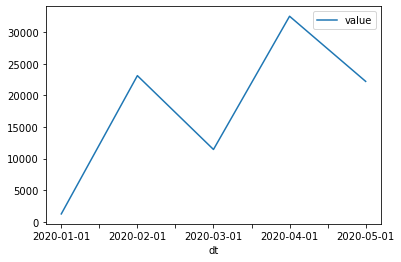

In [2]:
p = df.plot(x='dt', y='value')